In [1]:
import sys
sys.path.append("..")
%cd ..

/mnt/sdb1/frasos/DTU/Bachelor2021


In [2]:
from DataPrep.load_data import load_data
import keras
from keras import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input, Reshape
import pyforest
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


Using TensorFlow backend.


In [3]:
df = load_data()

In [4]:
df.columns

Index(['Label', 'Energy (kWh)', 'Fee (USD)', '# Professional & Other Places',
       '# Food', '# Shop & Service', '# Travel & Transport',
       '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
       '# Residence', '# College & University', '# Event', 'Plugs', 'Label_0',
       'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6',
       'Label_7', 'Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4'

In [5]:
df.head()

,Label,Energy (kWh),Fee (USD),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,# Nightlife Spot,...,Year_Month_3,Year_Month_4,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,0,6.249457,0.0,284,272,230,218.0,174,129,121.0,...,0,0,0,0,1,0,0,0,0,0
2011-07-30,0,28.978653,0.0,284,272,230,218.0,174,129,121.0,...,0,0,0,0,1,0,0,0,0,0
2011-07-31,0,37.209163,0.0,284,272,230,218.0,174,129,121.0,...,0,0,0,0,1,0,0,0,0,0
2011-08-01,0,5.041244,0.0,284,272,230,218.0,174,129,121.0,...,0,0,0,0,0,1,0,0,0,0
2011-08-02,0,16.210423,0.0,284,272,230,218.0,174,129,121.0,...,0,0,0,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

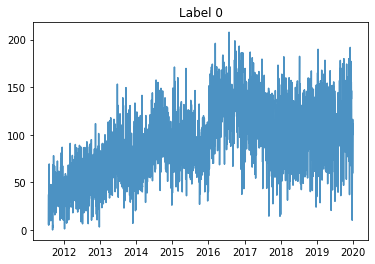

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

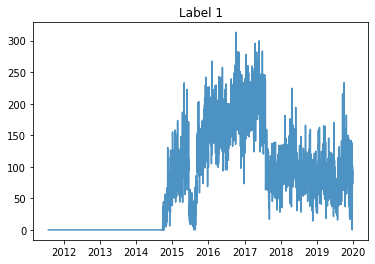

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

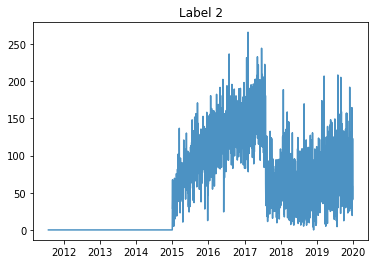

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

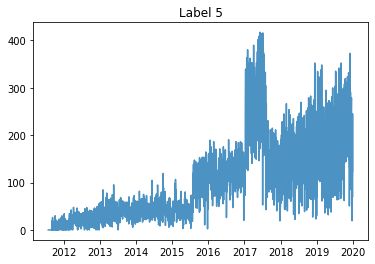

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

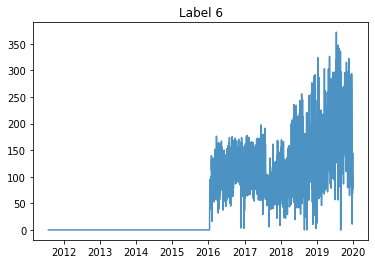

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

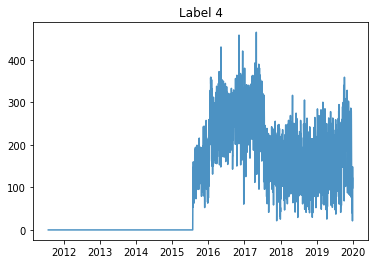

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

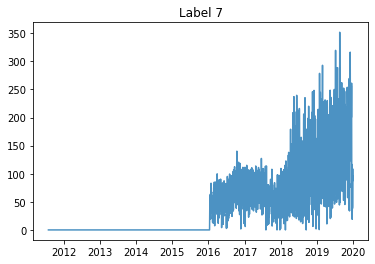

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

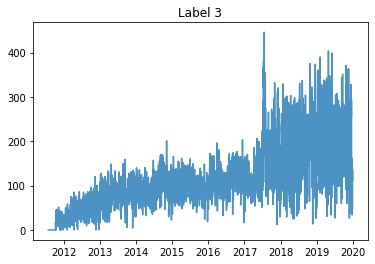

In [6]:
for l in df.Label.unique():
    
    plt.plot(df.index[df.Label == l],df["Energy (kWh)"][df.Label == l], alpha = 0.8)
    plt.title(f"Label {l}")
    plt.show()

In [7]:
cols_to_standardize = ['# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event']

sc = StandardScaler()
stand_poi = sc.fit_transform(df[cols_to_standardize])
stand_poi = pd.DataFrame(stand_poi, index=df.index, columns=cols_to_standardize)
for i in cols_to_standardize:
    df[i] = stand_poi[i]

<IPython.core.display.Javascript object>

In [8]:
df = df.fillna(0)

In [9]:
df.head()

,Label,Energy (kWh),Fee (USD),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,# Nightlife Spot,...,Year_Month_3,Year_Month_4,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,0,6.249457,0.0,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,0,0,0,0,1,0,0,0,0,0
2011-07-30,0,28.978653,0.0,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,0,0,0,0,1,0,0,0,0,0
2011-07-31,0,37.209163,0.0,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,0,0,0,0,1,0,0,0,0,0
2011-08-01,0,5.041244,0.0,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,0,0,0,0,0,1,0,0,0,0
2011-08-02,0,16.210423,0.0,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,0,0,0,0,0,1,0,0,0,0


In [9]:
def standardize(v):
    return (v - v.mean())/v.std()

In [10]:
df["Energy (kWh)"] = standardize(df["Energy (kWh)"])
     


In [11]:
def create_data(X,y, pred_len, time_slot):

    Xs, ys = [], []

    for i in range(int(len(X) - pred_len - time_slot + 1)):
        X_start = i
        X_end = X_start + time_slot
        y_start = X_end
        y_end = y_start + pred_len
        v = X.iloc[X_start:X_end].values
        Xs.append(v)
        ys.append(y[y_start:y_end])

    return np.array(Xs), np.array(ys)


In [13]:
df.columns

Index(['Label', 'Energy (kWh)', 'Fee (USD)', '# Professional & Other Places',
       '# Food', '# Shop & Service', '# Travel & Transport',
       '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
       '# Residence', '# College & University', '# Event', 'Plugs', 'Label_0',
       'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6',
       'Label_7', 'Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4'

In [12]:
df_temporal = df.drop(columns=['# Professional & Other Places',
       '# Food', '# Shop & Service', '# Travel & Transport',
       '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
       '# Residence', '# College & University', '# Event', 'Label_0',
       'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6'])

In [13]:
df_0 = df_temporal[df_temporal.Label == 0]

In [14]:
X = df_0
y = df_0["Energy (kWh)"]

In [15]:
X, y = create_data(X,y, 7, 30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
X.shape

(3042, 30, 74)

In [16]:
3042 - 1983 - 566

493

In [16]:
split = [1983, 393, 666]

In [17]:
X_train, X_val, X_test = tf.split(X, split)

<IPython.core.display.Javascript object>

In [18]:
y_train, y_val, y_test = tf.split(y, split)

<IPython.core.display.Javascript object>

In [21]:
X_train.shape

TensorShape([1983, 30, 55])

In [22]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [24]:
steps_per_epoch = int( np.ceil(X_train.shape[0] / 8) )

<IPython.core.display.Javascript object>

In [25]:
steps_per_epoch

248

In [26]:
int( np.ceil(X_val.shape[0] / 8) )

<IPython.core.display.Javascript object>

50

In [41]:
X_train.shape

TensorShape([1983, 30, 72])

In [53]:
X_train[2,-7:,1]

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([-0.47618594, -0.42557351, -0.83292482, -0.80317108, -0.67739118,
       -0.6666067 , -0.67861297])>

In [52]:
y_train[1]

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([-0.67861297, -0.68163865, -0.47187267, -0.76218113, -0.47408621,
       -0.45822387, -0.74990706])>

tensorflow.python.framework.ops.EagerTensor

In [19]:
import tensorflow.keras.backend as K
from tensorflow.keras.applications import *
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.models import *
from tensorflow import keras

In [22]:
def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [28]:
X_train.shape

TensorShape([1983, 30, 55])

In [34]:
inputs_lstm = Input(shape=(30,55))
x = LSTM(40, return_sequences = True, activation = "tanh")(inputs_lstm)
x = Dropout(0.5)(x)
x = LSTM(20, return_sequences = False, activation = "tanh")(x)
outputs_lstm = Dense(7)(x)


model = keras.Model(inputs=inputs_lstm, outputs=outputs_lstm, name="LSTM_model")
#opt = keras.optimizers.Adam(learning_rate=1*10**(-4))
model.compile(optimizer="Adam", loss='mse', metrics=[rmse])

history = model.fit(X_train, y_train, epochs=20, batch_size = 16,validation_data = (X_val, y_val))

Epoch 1/20
124/124 [==============================] - 2s 13ms/step - loss: 0.1372 - rmse: 0.3426 - val_loss: 0.2704 - val_rmse: 0.4784
Epoch 2/20
124/124 [==============================] - 1s 9ms/step - loss: 0.0863 - rmse: 0.2804 - val_loss: 0.2944 - val_rmse: 0.4965
Epoch 3/20
124/124 [==============================] - 1s 8ms/step - loss: 0.0833 - rmse: 0.2748 - val_loss: 0.2829 - val_rmse: 0.4872
Epoch 4/20
124/124 [==============================] - 1s 8ms/step - loss: 0.0809 - rmse: 0.2707 - val_loss: 0.2981 - val_rmse: 0.4980
Epoch 5/20
124/124 [==============================] - 1s 8ms/step - loss: 0.0781 - rmse: 0.2663 - val_loss: 0.2952 - val_rmse: 0.4988
Epoch 6/20
124/124 [==============================] - 1s 8ms/step - loss: 0.0748 - rmse: 0.2605 - val_loss: 0.2872 - val_rmse: 0.4886
Epoch 7/20
124/124 [==============================] - 1s 8ms/step - loss: 0.0720 - rmse: 0.2553 - val_loss: 0.2973 - val_rmse: 0.4944
Epoch 8/20
124/124 [==============================] - 1s 8ms/

In [55]:
def build_model(hp):
    inputs_lstm = Input(shape=(30,55))

    for i in range(hp.Int("LSTM_layers",1,2)):
        if i == 0:
            x = LSTM(hp.Int(f"LSTM_{i}",1,55), return_sequences = True, activation = "tanh")(inputs_lstm)
            x = Dropout(hp.Float(f'lstm{i}_dropout', min_value=0, max_value=0.9, step=0.1))(x)
        else:
            x = LSTM(hp.Int(f"LSTM_{i}",1,55), return_sequences = True, activation = "tanh")(x)
            x = Dropout(hp.Float(f'lstm{i}_dropout', min_value=0, max_value=0.9, step=0.1))(x)

    
    x = LSTM(hp.Int(f"LSTM_last",1,55), return_sequences = False, activation = "tanh")(x)
    x = Dropout(hp.Float(f'Dense_dropout', min_value=0, max_value=0.9, step=0.1))(x)

    outputs_lstm = Dense(7)(x)


    model = keras.Model(inputs=inputs_lstm, outputs=outputs_lstm, name="LSTM_model")
    opt = keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))

    model.compile(optimizer=opt, loss='mse', metrics=[rmse])

    return model


In [74]:
X_val[3,-7:,1]

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([0.72847659, 0.22900259, 0.79963543, 0.64974981, 0.66950166,
       0.5540883 , 0.59683078])>

In [75]:
y_val[2]

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([0.59683078, 0.48003308, 0.50014923, 0.26801718, 0.36609081,
       0.54816458, 0.7110704 ])>

In [56]:
import kerastuner as kt

tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_rmse", direction="min"),
    max_trials = 100,
    directory='Modelling/HyperParameterTuning',
    project_name='LSTM_1')

In [57]:
tuner.search(X_train, y_train,epochs=200, validation_data=(X_test, y_test), callbacks = [keras.callbacks.EarlyStopping(monitor = "val_rmse", patience = 5)])

Trial 4 Complete [00h 00m 12s]
val_rmse: 0.4324548840522766

Best val_rmse So Far: 0.4324548840522766
Total elapsed time: 00h 00m 49s

Search: Running Trial #5

Hyperparameter    |Value             |Best Value So Far 
LSTM_layers       |2                 |2                 
LSTM_0            |9                 |18                
lstm0_dropout     |0.7               |0.8               
LSTM_last         |41                |13                
Dense_dropout     |0.1               |0.1               
learning_rate     |0.0064546         |0.0087923         
LSTM_1            |53                |37                
lstm1_dropout     |0.4               |0.3               

Epoch 1/200


KeyboardInterrupt: 

In [43]:
best_model = tuner.get_best_models(1)[0]

In [45]:
best_model.summary()

Model: "LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 55)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 30, 55)            24420     
_________________________________________________________________
dropout (Dropout)            (None, 30, 55)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 1)             228       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 1)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 43)                7740      
_________________________________________________________________
dense (Dense)                (None, 7)                 3

array([ 0.79035074,  0.8738432 ,  0.7867793 ,  0.58673954,  0.15010683,
        0.0642594 ,  0.41255566,  0.6173722 ,  0.7426993 ,  0.695837  ,
        0.4784036 ,  0.22854558,  0.17545749,  0.25152156,  0.29695207,
        0.3652417 ,  0.2992643 ,  0.14412342,  0.04779601,  0.122857  ,
        0.2732971 ,  0.4038002 ,  0.62024266,  0.758549  ,  0.6153512 ,
        0.4355497 ,  0.51333237,  0.76083046,  0.83442664,  0.8085102 ,
        0.7127602 ,  0.5101074 ,  0.38579664,  0.37493896,  0.52194273,
        0.5954559 ,  0.7589011 ,  0.89817464,  0.78939193,  0.57259977,
        0.5793829 ,  0.7293897 ,  0.806267  ,  0.870877  ,  0.7832866 ,
        0.44333178,  0.25290984,  0.4720144 ,  0.7189384 ,  0.6141952 ,
        0.51726264,  0.5075598 ,  0.58118796,  0.6680747 ,  0.6887975 ,
        0.7612425 ,  0.7975753 ,  0.91111624,  1.0055673 ,  0.91675556,
        0.50104266,  0.25923172,  0.5964571 ,  0.7908335 ,  0.9258412 ,
        0.7544776 ,  0.4843697 ,  0.4760396 ,  0.67715   ,  0.72

In [35]:
model.summary()

Model: "LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 30, 55)]          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 40)            15360     
_________________________________________________________________
dropout (Dropout)            (None, 30, 40)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 20)                4880      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 147       
Total params: 20,387
Trainable params: 20,387
Non-trainable params: 0
_________________________________________________________________


In [99]:
X_val.shape

TensorShape([393, 30, 72])

In [38]:
model.predict(np.array(X_val[0]).reshape(1,30,55)).flatten()

<IPython.core.display.Javascript object>

array([0.6378917 , 0.7603719 , 0.64061445, 0.46418688, 0.20772085,
       0.20160247, 0.2805116 ], dtype=float32)

In [39]:
y_val[0]

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([0.66950166, 0.5540883 , 0.59683078, 0.48003308, 0.50014923,
       0.26801718, 0.36609081])>

<IPython.core.display.Javascript object>

array([ 0.6378917 ,  0.67385113,  0.6564464 ,  0.5371469 ,  0.2790102 ,
        0.13478853,  0.22353926,  0.34949145,  0.4250795 ,  0.44168845,
        0.33287737,  0.15133867,  0.06592181,  0.19255179,  0.32518286,
        0.4217484 ,  0.44900963,  0.3332884 ,  0.1964533 ,  0.24506217,
        0.43569657,  0.58953726,  0.6996622 ,  0.7080462 ,  0.5918648 ,
        0.4613247 ,  0.43155137,  0.5705789 ,  0.72015804,  0.7843601 ,
        0.79674524,  0.6362204 ,  0.4031814 ,  0.3723308 ,  0.5313116 ,
        0.6895469 ,  0.7841423 ,  0.7930539 ,  0.6959947 ,  0.59779984,
        0.58016765,  0.70451885,  0.79524046,  0.8364308 ,  0.8126597 ,
        0.6684901 ,  0.5050042 ,  0.48610964,  0.6285188 ,  0.7342079 ,
        0.80442095,  0.7926734 ,  0.6593713 ,  0.5203314 ,  0.48655555,
        0.6335072 ,  0.7687506 ,  0.8249311 ,  0.84425086,  0.74037766,
        0.4988301 ,  0.40372512,  0.5351336 ,  0.6578358 ,  0.74626166,
        0.71950215,  0.59311694,  0.4775639 ,  0.4861805 ,  0.62

<tf.Tensor: shape=(393,), dtype=float64, numpy=
array([ 0.66950166,  0.5540883 ,  0.59683078,  0.48003308,  0.50014923,
        0.26801718,  0.36609081,  0.54816458,  0.7110704 ,  0.57975004,
        0.90771443,  0.14996185,  0.3686247 ,  0.30541029,  0.52446971,
        0.66095069,  0.27944094,  0.9480286 ,  0.02251299,  0.41559847,
        0.10668924,  0.43045857,  0.4145959 ,  0.40603613,  0.696828  ,
        0.31797963,  0.65465553,  1.29921641,  0.39980154,  0.98785019,
        0.66509436,  0.65130465,  0.41159797, -0.03848289,  0.67243873,
        0.8863805 ,  0.52748722,  0.82673049,  0.71142377,  0.13692094,
        0.56354772,  0.3851185 ,  0.85821305,  0.83004929,  0.27070408,
        0.60817011,  0.32937144, -0.19799298,  1.22621153,  0.62877467,
        0.64930606,  0.68598941,  0.52308868,  0.39734524,  0.43029747,
        0.7009048 ,  0.94778751,  1.01715296,  0.73043076,  0.98766037,
        1.15887294, -0.14971328,  0.80770384,  0.91375452,  0.90158397,
        0.607207

In [52]:
r2_score(y_val[:,0],best_model.predict(np.array(X_val))[:,0])

<IPython.core.display.Javascript object>

0.20123323737521837

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

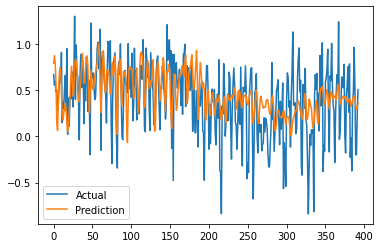

In [48]:

plt.plot(y_val[:,0], label = "Actual")
plt.plot(best_model.predict(np.array(X_val))[:,0], label = "Prediction")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

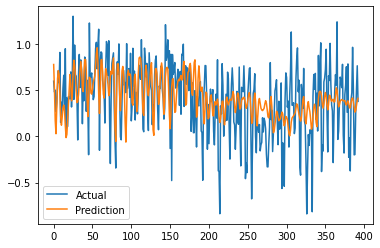

In [50]:
plt.plot(y_val[:,2], label = "Actual")
plt.plot(best_model.predict(np.array(X_val))[:,2], label = "Prediction")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

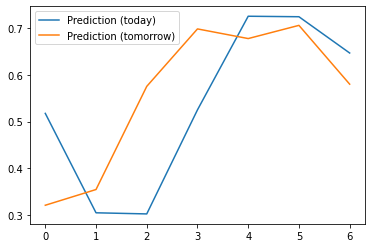

In [69]:
day = 94
plt.plot(model.predict(np.array(X_val[day]).reshape(1,30,55)).flatten(), label = "Prediction (today)")
plt.plot(model.predict(np.array(X_val[day + 1]).reshape(1,30,55)).flatten(), label = "Prediction (tomorrow)")
plt.legend()
plt.show()

In [73]:
preds = []
actual = []
for i in range(X_val.shape[0]):
    preds.append(model.predict(np.array(X_val[i]).reshape(1,30,55)).flatten()[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

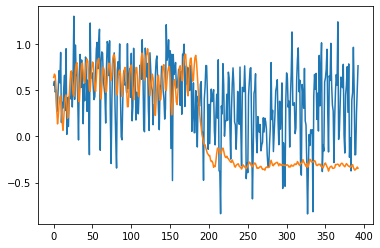

In [84]:
plt.plot(y_val[:,1])
plt.plot(preds)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

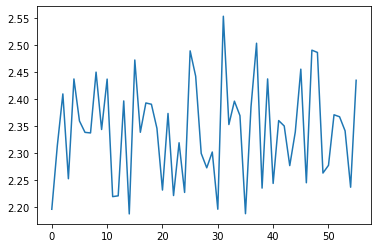

In [161]:

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

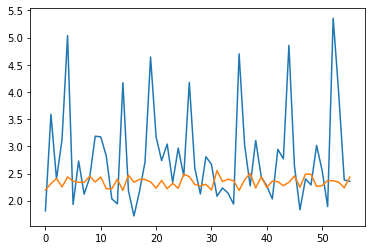

In [163]:
plt.plot(y_val[0])
plt.plot(model.predict(X_val)[0])
plt.show()

In [147]:
X_val[0]

<tf.Tensor: shape=(240, 81), dtype=float64, numpy=
array([[   6.        ,    2.34068723, -122.146     , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    2.78041914, -122.16      , ...,    0.        ,
           0.        ,    0.        ],
       [   5.        ,    3.03460329, -122.158     , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   5.        ,    3.79337143, -122.158     , ...,    0.        ,
           0.        ,    1.        ],
       [   3.        ,    4.81968309, -122.11321931, ...,    0.        ,
           0.        ,    1.        ],
       [   1.        ,    2.44940629, -122.163     , ...,    0.        ,
           0.        ,    1.        ]])>

In [561]:
X_val[0][-1][1]

2.692439024390244

In [580]:
model.predict(np.array(df[-1458:-2]).reshape(1,1456,81))

<IPython.core.display.Javascript object>

array([[2.7247455]], dtype=float32)

In [584]:
X_val.shape

(63, 1456, 81)

In [611]:
float(model.predict(np.array(df[-1458:-2]).reshape(1,1456,81)))

<IPython.core.display.Javascript object>

2.724745512008667

In [612]:
df.iloc[-1]["Energy (kWh)"]

3.383807692307693

In [965]:
def predic():
    preds = []
    for i in range(100):
        pred = float(model.predict(np.array(df[-1358+i:-102+i]).reshape(1,1256,81)))
        preds.append(pred)
    
    return preds

In [967]:
preds = predic()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [968]:
r2_score(np.array(df[-101:-1]["Energy (kWh)"]),np.array(preds))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-4.731077014302545

In [969]:
preds = []
for i in range(X_val.shape[0]):
    pred = model.predict(np.array(X_val[i]).reshape(1,1456,81))
    preds.append(float(pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [970]:
preds

[0.5611644983291626,
 0.5701436996459961,
 0.5911750197410583,
 0.5864356756210327,
 0.5948604941368103,
 0.6334630846977234,
 0.5695988535881042,
 0.5648144483566284,
 0.5442633628845215,
 0.4975155293941498,
 0.5873321294784546,
 0.6605113744735718,
 0.5594258308410645,
 0.6802462935447693,
 0.5902557969093323,
 0.6363338828086853,
 0.645184338092804,
 0.6324993371963501,
 0.6544402837753296,
 0.5992485284805298,
 0.5528717041015625,
 0.5810484886169434,
 0.6608498096466064,
 0.6520194411277771,
 0.6644423604011536,
 0.6175932288169861,
 0.6048698425292969,
 0.6740634441375732,
 0.5644179582595825,
 0.636368453502655,
 0.62565678358078,
 0.7037426233291626,
 0.6325733065605164,
 0.6466323137283325,
 0.692121684551239,
 0.5724148750305176,
 0.5354454517364502,
 0.6129343509674072,
 0.6178449988365173,
 0.6450437307357788,
 0.5890757441520691,
 0.5898423194885254,
 0.6192377209663391,
 0.5511139035224915,
 0.6237726211547852,
 0.6506972312927246,
 0.6842180490493774,
 0.696781158447265

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

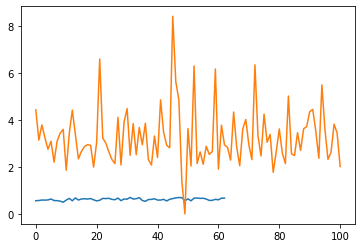

In [971]:
plt.plot(preds)
plt.plot(np.array(df[-102:-1]["Energy (kWh)"]))

## Bayesian Hyperparamter Tuning

In [973]:
import kerastuner as kt

In [974]:
def model_builder(hp):
    model = Sequential()
    mod
    for i in range(hp.Int('LSTM_layers',1,3)):
        model.add(LSTM(hp.Int(f'lstm{i}_units', min_value=10, max_value=80, step=5), return_sequences = True, activation = "tanh"))
        model.add(Dropout(hp.Float(f'lstm{i}_dropout', min_value=0, max_value=0.9, step=0.1)))
    
    for i in range(hp.Int('Dense_layers',1,3)):
        model.add(Dense(hp.Int(f'dense{i}_units', min_value=5, max_value=65, step=5), activation = "relu"))
        model.add(Dropout(hp.Float(f'dense{i}_dropout', min_value=0, max_value=0.9, step=0.1)))
    
    model.add(Dense(1))
    opt = keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))
    model.compile(optimizer=opt, loss = 'mse', metrics=['mae'])
    
    return model

In [975]:
def model_builder(hp):

    inputs = Input(shape=(None,81))
    
    x = LSTM(hp.Int('lstm0_units', min_value=20, max_value=60, step=2), return_sequences = True, activation = "tanh")(inputs)
    x = Dropout(hp.Float(f'lstm0_dropout', min_value=0, max_value=0.9, step=0.1))(x)
    
    lstm_layers = hp.Int('LSTM_layers',1,2)
    for i in range(lstm_layers):
        if i == max(range(lstm_layers)):
            x = LSTM(hp.Int(f'lstm{i + 1}_units', min_value=4, max_value=38, step=2), return_sequences = False, activation = "tanh")(x)
        else:
            x = LSTM(hp.Int(f'lstm{i + 1}_units', min_value=4, max_value=38, step=2), return_sequences = True, activation = "tanh")(x)
        x = Dropout(hp.Float(f'lstm{i + 1}_dropout', min_value=0, max_value=0.9, step=0.1))(x)
    
    for i in range(hp.Int('Dense_layers',0,3)):
        x = Dense(hp.Int(f'dense_units_{i}', min_value=1, max_value=15, step=1), activation="relu")(x)
        x = Dropout(hp.Float(f'dense{i}_dropout', min_value=0, max_value=0.9, step=0.1))(x)


    outputs = Dense(1)(x)

    m = keras.Model(inputs=inputs, outputs=outputs, name="LSTM_model")
    
    opt = keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))
    m.compile(optimizer=opt, loss='mse', metrics=["mae"])

    return m

In [976]:
tuner = kt.BayesianOptimization(model_builder,
                     objective='val_mae',
                     max_trials = 100,
                     directory='Modelling/HyperParameterTuning',
                     project_name='LSTM_small')

In [977]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

<IPython.core.display.Javascript object>

In [934]:
y_val.shape

(63, 8)

In [978]:
tuner.search(X_train_new, y_train_new, epochs=100 , batch_size=1, validation_data=(X_val_new,y_val_new), callbacks=[stop_early])


# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 32 Complete [02h 52m 49s]
val_mae: 0.6668657064437866

Best val_mae So Far: 0.6231744289398193
Total elapsed time: 21h 16m 20s

Search: Running Trial #33

Hyperparameter    |Value             |Best Value So Far 
lstm0_units       |50                |58                
lstm0_dropout     |0.9               |0.9               
LSTM_layers       |1                 |1                 
lstm1_units       |38                |14                
lstm1_dropout     |0.9               |0.9               
Dense_layers      |3                 |2                 
learning_rate     |0.0001            |0.0001            
lstm2_units       |4                 |4                 
lstm2_dropout     |0                 |0.3               
dense_units_0     |1                 |1                 
dense0_dropout    |0                 |0                 
dense_units_1     |1                 |1                 
dense1_dropout    |0.9               |0                 
dense_units_2     |1                 |1  

KeyboardInterrupt: 